# [NTDS'18] milestone 3: spectral graph theory
[ntds'18]: https://github.com/mdeff/ntds_2018

[Michaël Defferrard](http://deff.ch), [EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: `<your team number>`
* Students: `<the name of all students in the team>`
* Dataset: `<the dataset you used to complete the milestone>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to get familiar with the graph Laplacian and its spectral decomposition.

## 0 Load your network

In [1]:
%matplotlib inline

In [2]:
from our_functions import *

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [3]:
import numpy as np
import scipy
from scipy import sparse
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [4]:
import numpy as np

adjacency = np.load('adjacency.npy')
# deleting nodes without any connection
zero_index = np.where(np.sum(adjacency, axis=0) == 0)[0]
adjacency = np.delete(adjacency, zero_index, axis = 0)
adjacency = np.delete(adjacency, zero_index, axis = 1)

n_nodes =  np.count_nonzero(np.sum(adjacency, axis=0))
n_edges =  np.count_nonzero(adjacency) / 2

print('Number of nodes = {n:}'.format(n=n_nodes))
print('Number of edges = {e:}'.format(e=n_edges))

Number of nodes = 848
Number of edges = 8196.0


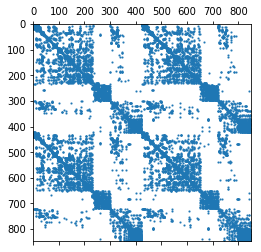

In [6]:
plt.spy(adjacency, markersize=1)

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

In [7]:
adj_csr = sparse.csr_matrix(adjacency)
print(adj_csr.shape)

(848, 848)


In [8]:
# Compute matrix D
degrees = adj_csr * np.ones((n_nodes,1))
D = np.diag(degrees[:,0])
D_csr = sparse.csr_matrix(D)


In [9]:
laplacian_combinatorial =  D_csr - adj_csr
D_half = scipy.linalg.fractional_matrix_power(D, 0.5)
D_half = linalg.inv(sparse.csc_matrix(D_half))
laplacian_normalized =  D_half*laplacian_combinatorial*D_half

Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

In [10]:
laplacian =  laplacian_normalized
type(laplacian)

scipy.sparse.csc.csc_matrix

### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [11]:
w, vl = scipy.linalg.eig(laplacian.toarray())
eigenvectors =  vl
eigenvalues =  w

idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[idx]


assert eigenvectors.shape == (n_nodes, n_nodes)

In [12]:
print('Max eigenvalue:{}'.format(max(eigenvalues)))
print('Min eigenvalues: {}'.format(min(eigenvalues)))

Max eigenvalue:(1.7481659383009864+0j)
Min eigenvalues: (-9.865611540967387e-16+0j)


Justify your choice of eigensolver.

**Answer:**

The solver used for computing the eigenvalues and eigenvector is the one provided by scipy linalg module. Although the usage of sparse matrices can make computation faster, the solver provided by the sparse module does not allow to compute all eigenvalues and eigenvectors of the laplacian and therefore, does not match our requirements

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

**Answer:**

$L$ is the **Incidence Matrix** that relates nodes and edges. It has the same number of rows as nodes in the network and the same number of columns as edges in the network.

$S^Tx$ 

### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

**Your answer here.**

What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?

**Answer:**

$|| S^Tx ||^2_2 = <S^Tx, S^Tx>$ $= x L x$

Computes de Laplacian along the graph¿?¿?

### Question 5

What is the value of $u_0$, both for the combinatorial and normalized Laplacians?

**Answer:**

$u_0$ is the corresponding eigenvector to the first eigenvalue which is always 0. $u_0$ **something related with the connectivity of the graph?**

### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

/Users/nataliebolon/miniconda3/envs/ntds_2018/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


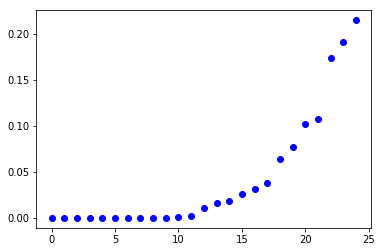

In [15]:
n = 25
plt.plot(list(range(n)), eigenvalues[:n],'bo')

/Users/nataliebolon/miniconda3/envs/ntds_2018/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


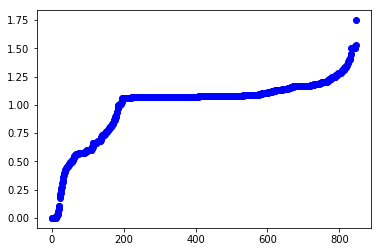

In [84]:
n = n_nodes
plt.plot(list(range(n)), eigenvalues[:n],'bo')

**Your answer here.**

How many connected components are there in your graph? Answer using the eigenvalues only.

1


Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

**Your answer here.**

## 3 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

**Your answer here.**

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

In [ ]:
# Your code here.

Plot the nodes embedded in 2D. Comment on what you see.

In [ ]:
# Your code here.

**Your answer here.**

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

**Your answer here.**

## 2 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

**Your answer here.**

### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

In [13]:
def norm_emb(adj, d0, d, k):
    #_, z = linalg.eigsh(adj.asfptype(), k=d)
    z = np.real(eigenvectors[d0:d])
    clusters = KMeans(k)
    clusters.fit(z)

    labels = clusters.labels_
    return labels




### Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

In [10]:
components = find_components(adjacency)
largest_component, size = find_largest_component(components)

In [18]:
def reorder(labels, k0, k, adjacency):
    r_adj = np.empty((adjacency.shape))

    m = 0
    for l in range(k): #number of clusters
        #Select rows to move
        nodes = np.where(labels == l)[0]
        for i in range(len(nodes)):
            # set new row as l previous row
            r_adj[i+m, :] = adjacency[nodes[i],:]
            #plt.spy(adj_reordered, markersize=3)
        m += len(nodes)
    reorder = np.empty((r_adj.shape))
    m=0
    for l in range(k):
        # Select columns to move
        nodes = np.where(labels == l)[0]
        for i in range(len(nodes)):
            reorder[:, i+m] = r_adj[:,nodes[i]]
        m += len(nodes)
            
    return reorder


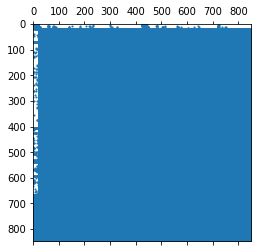

In [28]:
k = 4
lc_csr = sparse.csr_matrix(adjacency)
labels = norm_emb(lc_csr, 21, k)
adj_reordered = reorder(labels,k, adjacency)

plt.spy(adj_reordered, markersize=1)


In [21]:
import pandas as pd

In [45]:
file_path1 = '../data/TerroristRel/TerroristRel.edges'
file_path2 = '../data/TerroristRel/TerroristRel.labels'
file_path3 = '../data/TerroristRel/TerroristRel_Colleague.nodes'
file_path4 = '../data/TerroristRel/TerroristRel_Congregate.nodes'
file_path5 = '../data/TerroristRel/TerroristRel_Contact.nodes'
file_path6 = '../data/TerroristRel/TerroristRel_Family.nodes'

terrorist_rel_labels = pd.read_csv(file_path2, header=None)

    # Parse using tab and space delimiters
terrorist_rel_coll = pd.read_csv(file_path3, sep='\t|' '', header=None)

    # Parse using tab and space delimiters
terrorist_rel_cong = pd.read_csv(file_path4, sep='\t|' '', header=None)

    # Parse using tab and space delimiters
terrorist_rel_cont = pd.read_csv(file_path5, sep='\t|' '', header=None)

    # Parse using tab and space delimiters
terrorist_rel_fam = pd.read_csv(file_path6, sep='\t|' '', header=None)

/Users/nataliebolon/miniconda3/envs/ntds_2018/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/Users/nataliebolon/miniconda3/envs/ntds_2018/lib/python3.6/site-packages/pandas/io/parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/nataliebolon/miniconda3/envs/ntds_2018/lib/python3.6/site-packages/pandas/io/parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/nataliebolon/miniconda3/envs/ntds_2018/lib/python3.6/site-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators

**Your answer here.**

In [96]:
l1 = list(terrorist_rel_fam.loc[terrorist_rel_fam[1225]=='family'].index)
print(len(l1))
l2 = list(terrorist_rel_coll.loc[terrorist_rel_coll[1225]=='colleague'].index)
print(len(l2))
l3 = list(terrorist_rel_cont.loc[terrorist_rel_cont[1225]=='contact'].index)
print(len(l3))
l4 = list(terrorist_rel_cong.loc[terrorist_rel_cong[1225]=='congregate'].index)
print(len(l4))

l_tot = list(range(851))


t = pd.DataFrame(terrorist_rel_fam.iloc[:,1225], columns=['Nan'])
t['Col'] = terrorist_rel_coll.iloc[:, 1225]
t['Fam'] = terrorist_rel_fam.iloc[:, 1225]
t['Cong'] = terrorist_rel_cong.iloc[:, 1225]
t['Cont'] = terrorist_rel_cont.iloc[:, 1225]

print(list(t.loc[t['Fam'] == 'family'].index))

d = {}
for i in range(851):
    d[i] = 0
for i in list(t.loc[t['Fam'] == 'family'].index):
    d[i] += 1000
for i in list(t.loc[t['Col'] == 'colleague'].index):
    d[i] += 200
for i in list(t.loc[t['Cong'] == 'congregate'].index):
    d[i] += 30
for i in list(t.loc[t['Cont'] == 'contact'].index):
    d[i] += 4




136
461
148
106
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491]


Code: 0, #nodes: 387
Code: 200, #nodes: 314
Code: 204, #nodes: 12
Code: 1004, #nodes: 1
Code: 1234, #nodes: 105
Code: 1204, #nodes: 29


(array([387.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 326.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  29.,   0.,
        105.]),
 array([   0.  ,   12.34,   24.68,   37.02,   49.36,   61.7 ,   74.04,
          86.38,   98.72,  111.06,  123.4 ,  135.74,  148.08,  160.42,
         172.76,  185.1 ,  197.44,  209.78,  222.12,  234.46,  246.8 ,
         259.14,  271.48,  283.82,  296.16,  308.5 ,  320.84,  333.18,
         345.52,  357.86,  370.2 ,

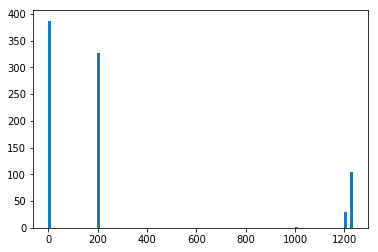

In [111]:
labs = []
for i in range(851):
    if i not in zero_index:
        labs.append(d[i])

labs = np.array(labs)
s = list(set(labs))
for j in s:
    print('Code: {}, #nodes: {}'.format(j, len(np.where(labs == j)[0])))
        
plt.hist(labs, bins=100)

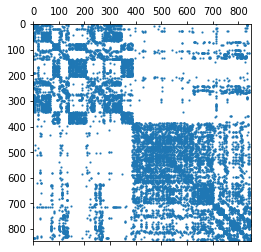

In [98]:
idx = labs.argsort()
A = adjacency[idx,:]
A = A[:,idx]
plt.spy(A,markersize=1)

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).

In [ ]:
# Your code here.

### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

**Your answer here.**